# TESTING: Ranking Annual Temperatures in Space

**Goal:** Create the data needed to recreate the map from: http://berkeleyearth.org/global-temperature-report-for-2021/ that displays cells on the Earth where it was the 1st, 2nd, or 3rd warmest/coldest year.

To do this we will need annual averages, then a way to rank them. Once ranked we can pull the rankings that 2021 had, then mask values at top 3 or bottom 3. Then it just needs to be colored appropriately.

In [1]:
# Libraries
import os
import xarray as xr
import datetime
import oisstools as ot
import warnings
import bottleneck


#### 1. Set workspace
workspace = "local"
box_root = ot.set_workspace("local")
_cache_root = ot.set_cache_root(box_root)

# What year are we pulling out to plot
start_yr = 1982
comparison_yr = 2021

#### 3. Print Last Update
print(f"Working via directory at:             {box_root}")
print(f"Years are ranked in temperature from: {start_yr}-{comparison_yr}")

Working via directory at:             /Users/akemberling/Library/CloudStorage/Box-Box/
Years are ranked in temperature from: 1982-2021


## Load OISST Temperatures for Complete Years

In [7]:
# Load all the complete years
temps = ot.load_box_oisst(box_root, 
                          start_yr = start_yr, 
                          end_yr = comparison_yr, 
                          anomalies = False, 
                          do_parallel = False)
temps

In [9]:
# Get yearly averages
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    temps_yrs = temps.groupby('time.year').mean().load()
    
temps_yrs

In [30]:
# Rank the years
yr_ranks = temps_yrs.rank("year")

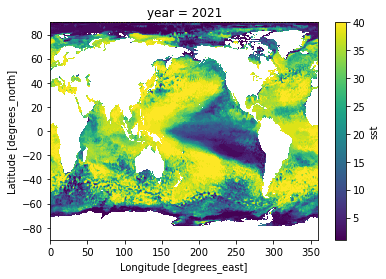

In [20]:
# Plot to see if it did what you thought
ranks_21 = yr_ranks.sst.sel(year = 2021)
ranks_21.plot()

In [36]:
# How many ranks there are (40)
comparison_yr - start_yr + 1

40

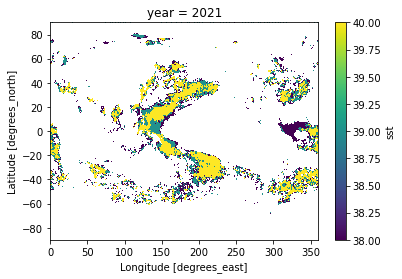

In [26]:
# Areas that experienced temps in top 3 warmest years
ranks_21.where(ranks_21 >= 38).plot()

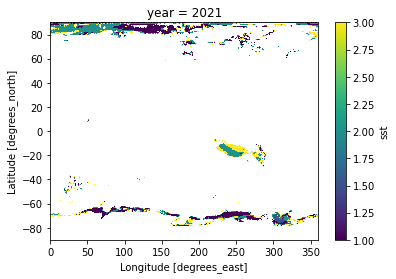

In [27]:
# Areas that experienced temps in bottom 3 warmest years
ranks_21.where(ranks_21 <= 3).plot()

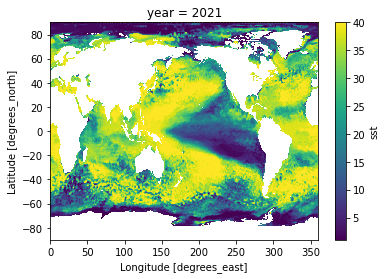

In [40]:
# Make them integers
ints_21 = ranks_21.astype(dtype = "int") 
ints_21.where(ints_21 > 0).plot()

In [ ]:
# Save the yearly ranks
ranks_fname <- f'{box_root}RES_Data/OISST/oisst_mainstays/temp_rankings/yrly_ranks_{start_year}to{comparison_yr}.nc'
yr_ranks.to_netcdf(ranks_fname)